BLEU (German)

=== BLEU DE Summary ===
      count      mean       std       min       25%       50%       75%  \
BLEU   33.0  5.478337  5.218006  0.000137  1.577672  4.765128  7.478399   

            max  
BLEU  23.061295  

BLEU (English)

=== BLEU EN Summary ===
      count      mean       std       min       25%       50%      75%  \
BLEU   33.0  5.986812  5.804073  0.003685  1.511217  4.707393  9.89288   

            max  
BLEU  25.589637  

ROUGE (German)

=== ROUGE DE Summary ===
               count       mean        std    min     25%     50%     75%  \
ROUGE-1_f       33.0  28.290333  11.640076  7.707  21.302  26.087  35.037   
ROUGE-2_f       33.0  12.418606   8.581190  1.515   5.633   9.524  17.832   
ROUGE-3_f       33.0   7.132970   6.527380  0.000   2.871   4.324  10.527   
ROUGE-4_f       33.0   4.636394   5.447873  0.000   0.749   2.247   7.086   
ROUGE-L_f       33.0  24.709818  10.799636  6.491  16.568  23.158  30.380   
ROUGE-SU4_f     33.0  11.747727   7.561336  

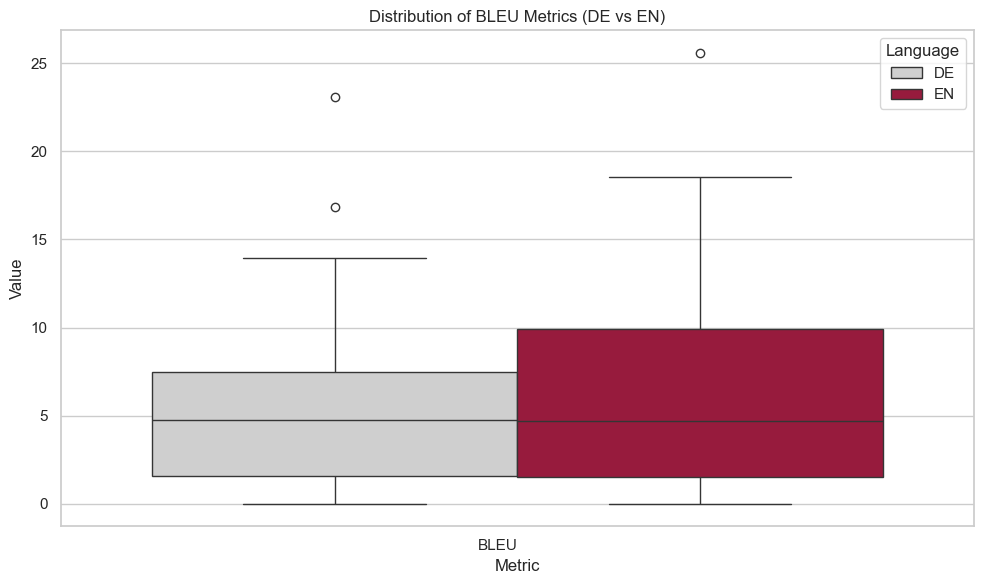

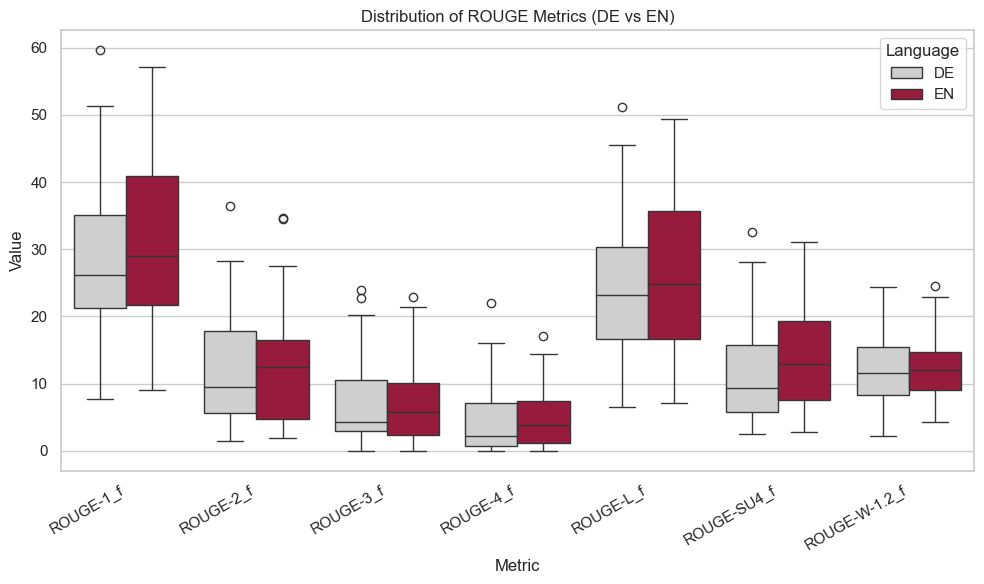

In [14]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------
# 1) LOAD AND AGGREGATE BLEU/ROUGE
# ----------------------------------------------------------------------------

# Paths to BLEU/ROUGE CSVs (adjust to your file locations)
bleu_de_path = "../../../data/eval/bleu_evaluation_de.csv"
bleu_en_path = "../../../data/eval/bleu_evaluation_en.csv"
rouge_de_path = "../../../data/eval/rouge_evaluation_de.csv"
rouge_en_path = "../../../data/eval/rouge_evaluation_en.csv"

# Read the CSVs
bleu_de = pd.read_csv(bleu_de_path)
bleu_en = pd.read_csv(bleu_en_path)
rouge_de = pd.read_csv(rouge_de_path)
rouge_en = pd.read_csv(rouge_en_path)

# Columns of interest
bleu_cols = [
    "BLEU",
]
rouge_cols = [
    "ROUGE-1_f","ROUGE-2_f","ROUGE-3_f","ROUGE-4_f",
    "ROUGE-L_f","ROUGE-SU4_f","ROUGE-W-1.2_f"
]

# --- Compute summary stats for BLEU (German vs English) ---
def summarize_metrics(df, metric_cols, lang_label):
    summary_df = df[metric_cols].describe().transpose()  # mean, std, min, max, etc.
    print(f"\n=== {lang_label} Summary ===")
    print(summary_df)
    return summary_df

print("BLEU (German)")
bleu_de_summary = summarize_metrics(bleu_de, bleu_cols, lang_label="BLEU DE")

print("\nBLEU (English)")
bleu_en_summary = summarize_metrics(bleu_en, bleu_cols, lang_label="BLEU EN")

print("\nROUGE (German)")
rouge_de_summary = summarize_metrics(rouge_de, rouge_cols, lang_label="ROUGE DE")

print("\nROUGE (English)")
rouge_en_summary = summarize_metrics(rouge_en, rouge_cols, lang_label="ROUGE EN")


# ----------------------------------------------------------------------------
# 2) OPTIONAL: DISTRIBUTION PLOTS (EXAMPLE: BOX PLOTS)
# ----------------------------------------------------------------------------

sns.set_theme(style="whitegrid")
palette = {'DE': '#cfcfcf', 'EN': '#ac0634'}


# Merge the data into a single DF for easy plotting: 
# We'll add a 'Language' column and a 'Metric' column
bleu_de_long = bleu_de.melt(
    id_vars=["question_id_q"],
    value_vars=bleu_cols,
    var_name="Metric",
    value_name="Value"
)
bleu_de_long["Language"] = "DE"

bleu_en_long = bleu_en.melt(
    id_vars=["question_id_q"],
    value_vars=bleu_cols,
    var_name="Metric",
    value_name="Value"
)
bleu_en_long["Language"] = "EN"

bleu_concat = pd.concat([bleu_de_long, bleu_en_long], ignore_index=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=bleu_concat, x="Metric", y="Value", hue="Language", palette=palette)
plt.title("Distribution of BLEU Metrics (DE vs EN)")
plt.xticks(ha="right")
plt.tight_layout()
plt.show()


# Similarly for ROUGE:
rouge_de_long = rouge_de.melt(
    id_vars=["question_id_q"],
    value_vars=rouge_cols,
    var_name="Metric",
    value_name="Value",
)
rouge_de_long["Language"] = "DE"

rouge_en_long = rouge_en.melt(
    id_vars=["question_id_q"],
    value_vars=rouge_cols,
    var_name="Metric",
    value_name="Value"
)
rouge_en_long["Language"] = "EN"

rouge_concat = pd.concat([rouge_de_long, rouge_en_long], ignore_index=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=rouge_concat, x="Metric", y="Value", hue="Language", palette=palette)
plt.title("Distribution of ROUGE Metrics (DE vs EN)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


C:\Users\wurch\AppData\Local\Temp\ipykernel_17432\3923660282.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.118' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_17432\3923660282.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.185' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_17432\3923660282.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.239' has dtype incompatible with float64, please explicitly cast to a compa

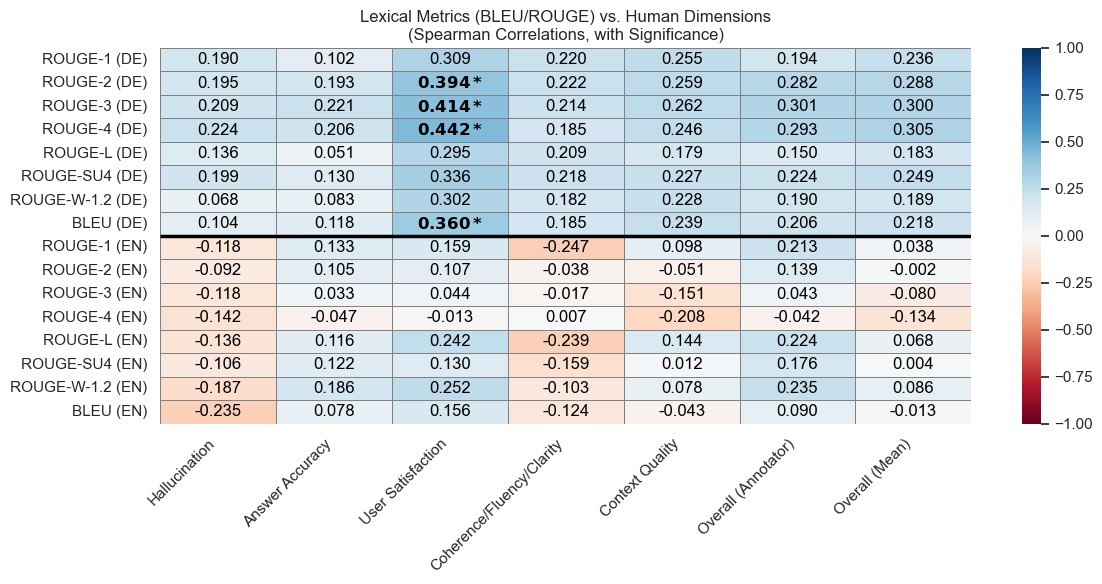

human_column,Hallucination,Answer Accuracy,User Satisfaction,Coherence/Fluency/Clarity,Context Quality,Overall (Annotator),Overall (Mean)
ROUGE-1 (DE),0.190,0.102,0.309,0.220,0.255,0.194,0.236
ROUGE-2 (DE),0.195,0.193,$\bf{0.394*}$,0.222,0.259,0.282,0.288
ROUGE-3 (DE),0.209,0.221,$\bf{0.414*}$,0.214,0.262,0.301,0.300
ROUGE-4 (DE),0.224,0.206,$\bf{0.442*}$,0.185,0.246,0.293,0.305
ROUGE-L (DE),0.136,0.051,0.295,0.209,0.179,0.150,0.183
ROUGE-SU4 (DE),0.199,0.130,0.336,0.218,0.227,0.224,0.249
ROUGE-W-1.2 (DE),0.068,0.083,0.302,0.182,0.228,0.190,0.189
BLEU (DE),0.104,0.118,$\bf{0.360*}$,0.185,0.239,0.206,0.218
ROUGE-1 (EN),-0.118,0.133,0.159,-0.247,0.098,0.213,0.038
ROUGE-2 (EN),-0.092,0.105,0.107,-0.038,-0.051,0.139,-0.002


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------[ 1. LOAD & FILTER DATA ]-------------------
corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
df_corr = pd.read_csv(corr_path)

lexical_files = [
    "bleu_evaluation_de.csv",
    "bleu_evaluation_en.csv",
    "rouge_evaluation_de.csv",
    "rouge_evaluation_en.csv"
]
df_lex = df_corr[df_corr["metric_file"].isin(lexical_files)].copy()

key_human_dims = [
    "avg_hallucination", "avg_answer_acc", "avg_user_sat",
    "avg_coherence", "avg_context_qual", "avg_overall", "overall_mean"
]
df_lex = df_lex[df_lex["human_column"].isin(key_human_dims)]


# ------------------[ 2. PIVOT CORRELATION & P-VALUES ]-------------------
pivot_corr = df_lex.pivot_table(
    index=["metric_column","language"], 
    columns="human_column",
    values="spearman_corr"
)
pivot_pval = df_lex.pivot_table(
    index=["metric_column","language"], 
    columns="human_column",
    values="p_value"
)


# ------------------[ 3. SIGNIFICANCE FUNCTION ]-------------------
def significance_marker_and_bold(r_val, p_val):
    if p_val < 0.001:
        stars = "***"
    elif p_val < 0.01:
        stars = "**"
    elif p_val < 0.05:
        stars = "*"
    else:
        stars = ""
    base_val_str = f"{r_val:.3f}{stars}"
    if p_val < 0.05:
        # LaTeX style bold
        return f"$\\bf{{{base_val_str}}}$"
    else:
        return base_val_str


# ------------------[ 4. CREATE ANNOTATION DATAFRAME ]-------------------
annot_df = pivot_corr.copy()

for idx in pivot_corr.index:
    for col in pivot_corr.columns:
        r_val = pivot_corr.loc[idx, col]
        p_val = pivot_pval.loc[idx, col]
        annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)


# ------------------[ 5. RENAME COLUMNS TO USER-FRIENDLY ]-------------------
col_renames = {
    "avg_hallucination": "Hallucination",
    "avg_answer_acc": "Answer Accuracy",
    "avg_user_sat": "User Satisfaction",
    "avg_coherence": "Coherence/Fluency/Clarity",
    "avg_context_qual": "Context Quality",
    "avg_overall": "Overall (Annotator)",
    "overall_mean": "Overall (Mean)"
}
pivot_corr.rename(columns=col_renames, inplace=True)
annot_df.rename(columns=col_renames, inplace=True)


# ------------------[ 6. CREATE ROW LABELS: "ROUGE-4_f|de" ]-------------------
new_index_labels = []
for (metric_col, lang) in pivot_corr.index:
    # E.g. "ROUGE-1_f|de", "BLEU|en", etc.
    new_index_labels.append(f"{metric_col}|{lang}")

pivot_corr.index = new_index_labels
annot_df.index   = new_index_labels

row_renames = {
    # ROUGE metrics for German
    "ROUGE-1_f|de": "ROUGE-1 (DE)",
    "ROUGE-2_f|de": "ROUGE-2 (DE)",
    "ROUGE-3_f|de": "ROUGE-3 (DE)",
    "ROUGE-4_f|de": "ROUGE-4 (DE)",
    "ROUGE-L_f|de": "ROUGE-L (DE)",
    "ROUGE-SU4_f|de": "ROUGE-SU4 (DE)",
    "ROUGE-W-1.2_f|de": "ROUGE-W-1.2 (DE)",
    
    # BLEU metric for German
    "BLEU|de": "BLEU (DE)",
    
    # ROUGE metrics for English
    "ROUGE-1_f|en": "ROUGE-1 (EN)",
    "ROUGE-2_f|en": "ROUGE-2 (EN)",
    "ROUGE-3_f|en": "ROUGE-3 (EN)",
    "ROUGE-4_f|en": "ROUGE-4 (EN)",
    "ROUGE-L_f|en": "ROUGE-L (EN)",
    "ROUGE-SU4_f|en": "ROUGE-SU4 (EN)",
    "ROUGE-W-1.2_f|en": "ROUGE-W-1.2 (EN)",
    
    # BLEU metric for English
    "BLEU|en": "BLEU (EN)"
}

pivot_corr.rename(index=row_renames, inplace=True)
annot_df.rename(index=row_renames, inplace=True)

# ------------------[ 7. DEFINE DESIRED ROW ORDER & COLUMN ORDER ]-------------------
# Row order:
row_order = list(row_renames.values())

# Column order:
col_order = [
    "Hallucination",
    "Answer Accuracy",
    "User Satisfaction",
    "Coherence/Fluency/Clarity",
    "Context Quality",
    "Overall (Annotator)",
    "Overall (Mean)"
]

# Reindex pivot_corr and annot_df with these custom orders
pivot_corr = pivot_corr.reindex(index=row_order, columns=col_order)
annot_df   = annot_df.reindex(index=row_order, columns=col_order)


# ------------------[ 8. PLOT THE HEATMAP ]-------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.heatmap(
    data=pivot_corr.astype(float),  
    annot=annot_df,       # annotated text with significance
    fmt="",
    cmap="RdBu",
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"color": "black"}  # Set text color to black
)

# Add a line to separate German and English rows
split_index = len([row for row in row_order if '(DE)' in row])  # Count German rows
ax.hlines(
    y=split_index,        # Position of the split line
    xmin=0, xmax=len(col_order),  # Across the entire width of the heatmap
    color="black", linewidth=2.5  # Thicker line
)

ax.set_title("Lexical Metrics (BLEU/ROUGE) vs. Human Dimensions\n(Spearman Correlations, with Significance)")
ax.set_xlabel('')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../../../data/figures/lexical/heatmap_lexical_metrics.png")
plt.show()
annot_df

In [58]:
import pandas as pd

# Path to your correlation file from the previous steps
corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
df_corr = pd.read_csv(corr_path)

# 1) Identify the lexical metric files: BLEU and ROUGE
lexical_files = [
    "bleu_evaluation_de.csv",
    "bleu_evaluation_en.csv",
    "rouge_evaluation_de.csv",
    "rouge_evaluation_en.csv",
]

# 2) Filter for these files only
df_lex = df_corr[df_corr["metric_file"].isin(lexical_files)].copy()

# 3) Optionally, limit to certain human columns of interest
#    For example, if you're particularly interested in 'avg_answer_acc' or 'avg_hallucination'.
key_human_dims = ["avg_hallucination", "avg_answer_acc", "avg_user_sat", "avg_coherence", "avg_context_qual", "avg_overall", "overall_mean"]
df_lex = df_lex[df_lex["human_column"].isin(key_human_dims)]

# show all rows
pd.set_option('display.max_rows', None)
# 4) Print or inspect
print("Filtered lexical correlations against selected human dimensions:")
df_lex[[
    "metric_file", "metric_column", "human_column", 
    "language", "spearman_corr", "p_value"
]].sort_values("spearman_corr", ascending=False).head()


Filtered lexical correlations against selected human dimensions:


,metric_file,metric_column,human_column,language,spearman_corr,p_value
79,rouge_evaluation_de.csv,ROUGE-4_f,avg_user_sat,de,0.441850,0.010042
72,rouge_evaluation_de.csv,ROUGE-3_f,avg_user_sat,de,0.414220,0.016551
65,rouge_evaluation_de.csv,ROUGE-2_f,avg_user_sat,de,0.394214,0.023203
156,bleu_evaluation_de.csv,BLEU,avg_user_sat,de,0.360294,0.039429
93,rouge_evaluation_de.csv,ROUGE-SU4_f,avg_user_sat,de,0.336499,0.055522


In [77]:
# Pivot: index = (metric_file, metric_column, language),
#         columns = human_column,
#         values = spearman_corr
corr_pivot = df_lex.pivot_table(
    index=["metric_file", "metric_column", "language"],
    columns="human_column",
    values="spearman_corr"
).reset_index()

print("\nPivoted table of Spearman correlations (lexical metrics vs. human columns):")
corr_pivot = corr_pivot.drop(columns=["metric_file"])
corr_pivot



Pivoted table of Spearman correlations (lexical metrics vs. human columns):


human_column,metric_column,language,avg_answer_acc,avg_coherence,avg_context_qual,avg_hallucination,avg_overall,avg_user_sat,overall_mean
0,BLEU,de,0.118490,0.185092,0.239296,0.103991,0.206350,0.360294,0.218078
1,BLEU,en,0.077542,-0.123951,-0.043443,-0.234594,0.090163,0.156290,-0.012552
2,ROUGE-1_f,de,0.102363,0.220495,0.254822,0.190451,0.193675,0.309498,0.236475
3,ROUGE-2_f,de,0.193183,0.221870,0.259209,0.195047,0.281894,0.394214,0.287650
4,ROUGE-3_f,de,0.220869,0.214058,0.261791,0.209433,0.300820,0.414220,0.300276
5,ROUGE-4_f,de,0.205862,0.184756,0.246019,0.224352,0.292731,0.441850,0.304968
6,ROUGE-L_f,de,0.050588,0.208981,0.178544,0.136328,0.150242,0.295323,0.182624
7,ROUGE-SU4_f,de,0.130034,0.217746,0.226639,0.199472,0.224433,0.336499,0.248683
8,ROUGE-W-1.2_f,de,0.082841,0.182343,0.228496,0.068420,0.190464,0.302411,0.188645
9,ROUGE-1_f,en,0.133412,-0.247384,0.097916,-0.118148,0.212697,0.158828,0.037657


In [56]:
# List of human dimensions and languages
key_human_dims = [
    "avg_hallucination", "avg_answer_acc", "avg_user_sat", 
    "avg_coherence", "avg_context_qual", "avg_overall", "overall_mean"
]
languages = ["de", "en"]

# Create a list to store the results
best_results = []

# Loop through each combination of human dimension and language
for human_dim in key_human_dims:
    for lang in languages:
        # Subset data
        subset = df_lex[
            (df_lex["human_column"] == human_dim) & 
            (df_lex["language"] == lang) 
            # (df_lex["p_value"] < 0.05)  # Filter for p_value < 0.05
        ].copy()
        
        # Check if any rows remain after filtering
        if not subset.empty:
            # Get the best result (highest spearman_corr)
            best_row = subset.loc[subset["spearman_corr"].idxmax()]
            
            # Append to the results
            best_results.append({
                "human_dimension": human_dim,
                "language": lang,
                "metric_file": best_row["metric_file"],
                "metric_column": best_row["metric_column"],
                "spearman_corr": best_row["spearman_corr"],
                "p_value": best_row["p_value"]
            })

# Convert the results to a DataFrame for easier visualization or saving
best_results_df = pd.DataFrame(best_results)

# Optionally save to a file
# best_results_df.to_csv("best_correlation_results.csv", index=False)
best_results_df



,human_dimension,language,metric_file,metric_column,spearman_corr,p_value
0,avg_hallucination,de,rouge_evaluation_de.csv,ROUGE-4_f,0.224352,0.209412
1,avg_hallucination,en,rouge_evaluation_en.csv,ROUGE-2_f,-0.091760,0.611543
2,avg_answer_acc,de,rouge_evaluation_de.csv,ROUGE-3_f,0.220869,0.216758
3,avg_answer_acc,en,rouge_evaluation_en.csv,ROUGE-W-1.2_f,0.185558,0.301200
4,avg_user_sat,de,rouge_evaluation_de.csv,ROUGE-4_f,0.441850,0.010042
5,avg_user_sat,en,rouge_evaluation_en.csv,ROUGE-W-1.2_f,0.252196,0.156805
6,avg_coherence,de,rouge_evaluation_de.csv,ROUGE-2_f,0.221870,0.214628
7,avg_coherence,en,rouge_evaluation_en.csv,ROUGE-4_f,0.006570,0.971053
8,avg_context_qual,de,rouge_evaluation_de.csv,ROUGE-3_f,0.261791,0.141104
9,avg_context_qual,en,rouge_evaluation_en.csv,ROUGE-L_f,0.144413,0.422657


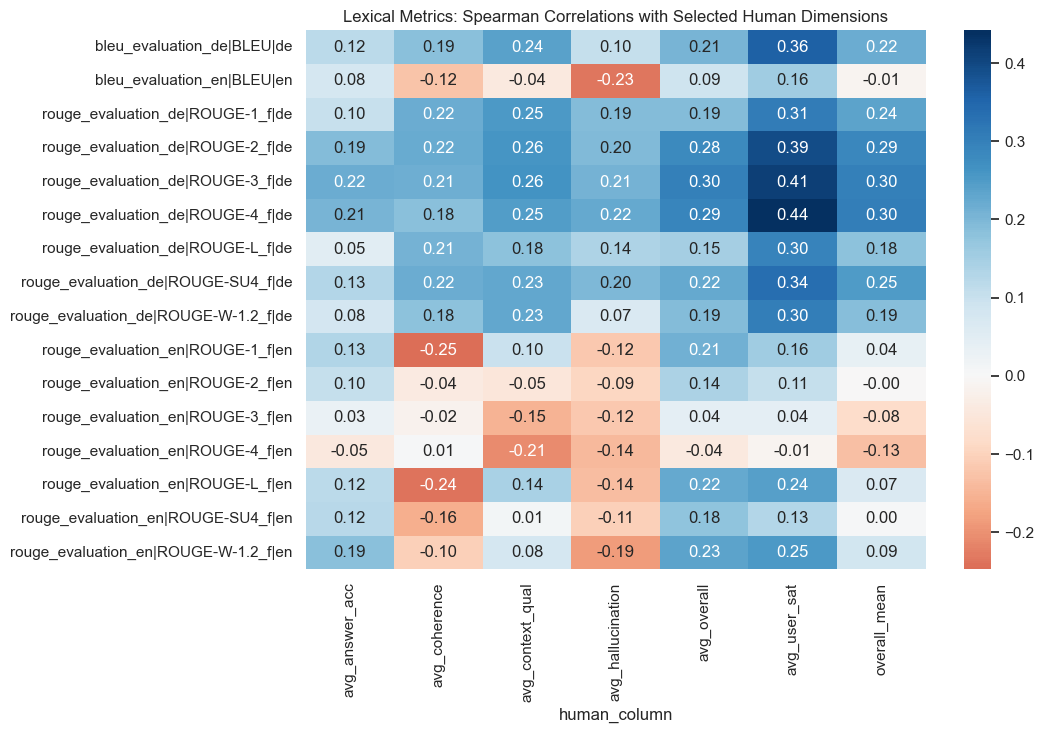

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the pivot table from step #2
df_heat = corr_pivot.drop(columns=["metric_file", "metric_column", "language"])

#   - Each row corresponds to a single (metric_file, metric_column, language)
#   - That might be too many rows to see clearly in a single heatmap, so
#     consider subsetting or merging the row labels.

# If you want to unify the row label, combine the file, column, and language:
row_labels = corr_pivot.apply(lambda row: f"{row['metric_file'].replace('.csv','')}|{row['metric_column']}|{row['language']}", axis=1)
df_heat.index = row_labels

plt.figure(figsize=(10,7))
sns.heatmap(data=df_heat, annot=True, cmap="RdBu", center=0, fmt=".2f")
plt.title("Lexical Metrics: Spearman Correlations with Selected Human Dimensions")
plt.show()


In [ ]:

# ----------------------------------------------------------------------------
# 3) CORRELATIONS WITH HUMAN JUDGMENTS
#    We'll read the correlation_splits_filtered_llm.csv or final correlation file,
#    then filter for BLEU or ROUGE results, pivot or present them as needed.
# ----------------------------------------------------------------------------

corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
corr_df = pd.read_csv(corr_path)

# We only want rows referencing the BLEU or ROUGE metric files
bleu_rouge_files = [
    "bleu_evaluation_de.csv",
    "bleu_evaluation_en.csv",
    "rouge_evaluation_de.csv",
    "rouge_evaluation_en.csv"
]
subset_corr = corr_df[corr_df["metric_file"].isin(bleu_rouge_files)].copy()

# Now we can see how each metric_column correlates with each human_column
# For instance, let's group by metric_file, metric_column, human_column
grouped = subset_corr.groupby(["metric_file", "metric_column", "human_column", "language"])
# We'll just print out the correlation, ignoring p-value for brevity
for (mf, mc, hc, lang), grp in grouped:
    # Typically there's just one row per group if the data is stored individually
    r = grp["spearman_corr"].iloc[0]
    pval = grp["p_value"].iloc[0]
    print(f"{mf} | {mc} vs {hc} | Lang={lang} => Spearman r={r:.3f}, p={pval:.3g}")
    # Create a DataFrame from the grouped results
    correlation_results = []


# Alternatively, pivot to see dimension vs. metric correlation in a matrix:
pivoted = subset_corr.pivot_table(
    index=["metric_file","metric_column","language"],
    columns="human_column",
    values="spearman_corr",
).reset_index()

print("\nPivoted correlation table (Spearman):\n", pivoted)
pivoted.head()


bleu_evaluation_de.csv | BLEU vs avg_answer_acc | Lang=de => Spearman r=0.118, p=0.511
bleu_evaluation_de.csv | BLEU vs avg_coherence | Lang=de => Spearman r=0.185, p=0.302
bleu_evaluation_de.csv | BLEU vs avg_context_qual | Lang=de => Spearman r=0.239, p=0.18
bleu_evaluation_de.csv | BLEU vs avg_hallucination | Lang=de => Spearman r=0.104, p=0.565
bleu_evaluation_de.csv | BLEU vs avg_overall | Lang=de => Spearman r=0.206, p=0.249
bleu_evaluation_de.csv | BLEU vs avg_user_sat | Lang=de => Spearman r=0.360, p=0.0394
bleu_evaluation_de.csv | BLEU vs overall_mean | Lang=de => Spearman r=0.218, p=0.223
bleu_evaluation_en.csv | BLEU vs avg_answer_acc | Lang=en => Spearman r=0.078, p=0.668
bleu_evaluation_en.csv | BLEU vs avg_coherence | Lang=en => Spearman r=-0.124, p=0.492
bleu_evaluation_en.csv | BLEU vs avg_context_qual | Lang=en => Spearman r=-0.043, p=0.81
bleu_evaluation_en.csv | BLEU vs avg_hallucination | Lang=en => Spearman r=-0.235, p=0.189
bleu_evaluation_en.csv | BLEU vs avg_ove

human_column,metric_file,metric_column,language,avg_answer_acc,avg_coherence,avg_context_qual,avg_hallucination,avg_overall,avg_user_sat,overall_mean
0,bleu_evaluation_de.csv,BLEU,de,0.118490,0.185092,0.239296,0.103991,0.206350,0.360294,0.218078
1,bleu_evaluation_en.csv,BLEU,en,0.077542,-0.123951,-0.043443,-0.234594,0.090163,0.156290,-0.012552
2,rouge_evaluation_de.csv,ROUGE-1_f,de,0.102363,0.220495,0.254822,0.190451,0.193675,0.309498,0.236475
3,rouge_evaluation_de.csv,ROUGE-2_f,de,0.193183,0.221870,0.259209,0.195047,0.281894,0.394214,0.287650
4,rouge_evaluation_de.csv,ROUGE-3_f,de,0.220869,0.214058,0.261791,0.209433,0.300820,0.414220,0.300276
